# Dilate and Erode

In [1]:
import numpy
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

# Bild laden

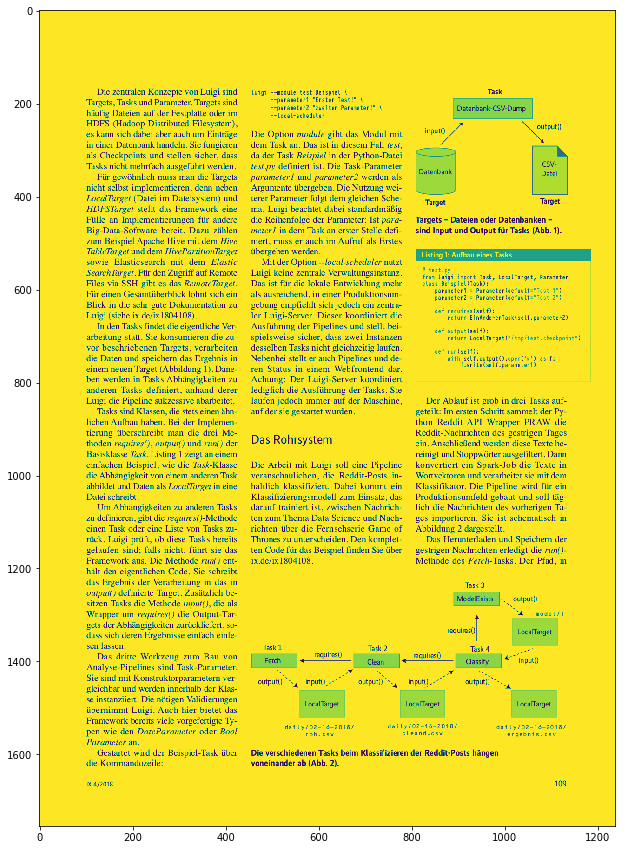

In [2]:
file = 'documents/dokument.tiff'
im = cv2.imread(file, 0)
plt.figure(figsize=(15, 15))
plt.imshow(im)

# Dilate

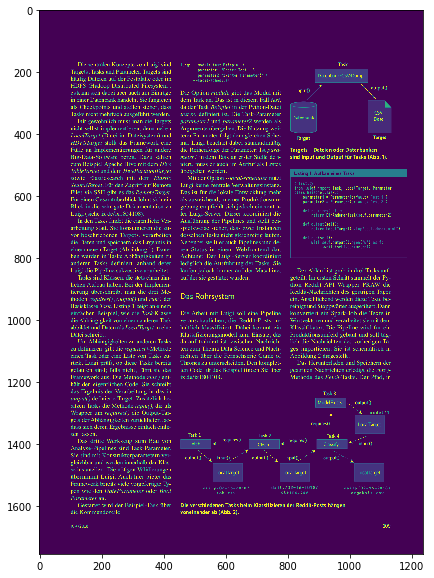

In [3]:
neg = cv2.bitwise_not(im)
plt.figure(figsize=(10, 10))
plt.imshow(neg)

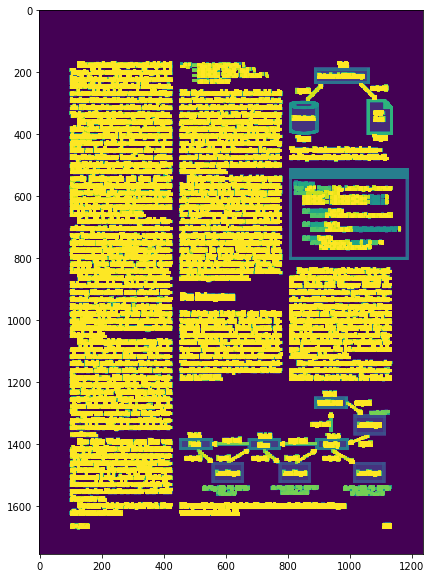

In [4]:
kernel = numpy.ones((10, 10))
dilated = cv2.dilate(neg, kernel, iterations=1)
plt.figure(figsize=(10, 10))
plt.imshow(dilated)

# Erode

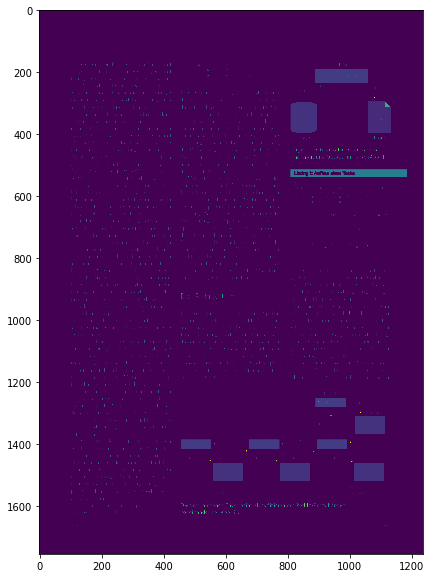

In [5]:
kernel = numpy.ones((3, 3))
eroded = cv2.erode(neg, kernel, iterations=1)
plt.figure(figsize=(10, 10))
plt.imshow(eroded)

# Gradient

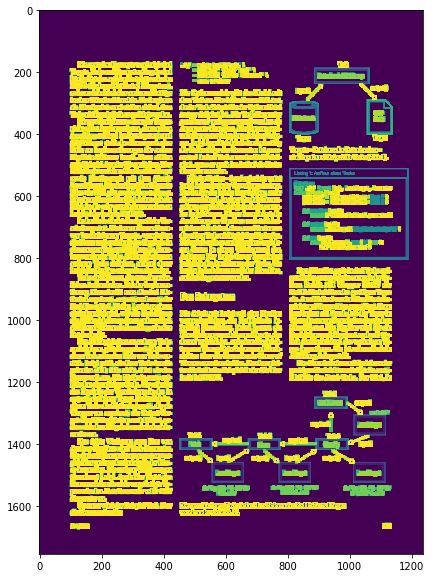

In [6]:
gradient = dilated - eroded
plt.figure(figsize=(10, 10))
plt.imshow(gradient)

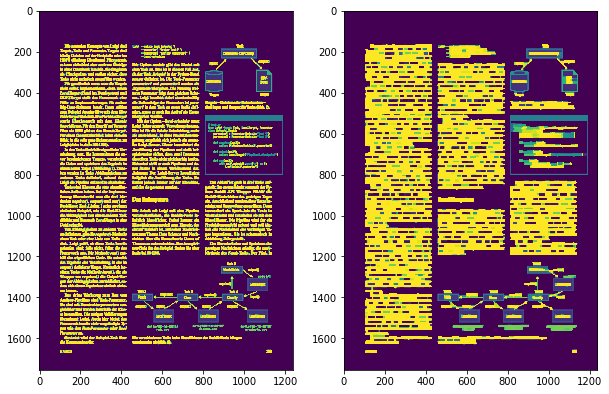

In [7]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
dilate = cv2.morphologyEx(neg, cv2.MORPH_DILATE, kernel)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (10, 5))
connected = cv2.morphologyEx(dilate, cv2.MORPH_CLOSE, kernel, iterations=2)

fig = plt.figure(figsize=(10, 10))
fig.add_subplot(1, 2, 1)
plt.imshow(dilate)
fig.add_subplot(1, 2, 2)
plt.imshow(connected)

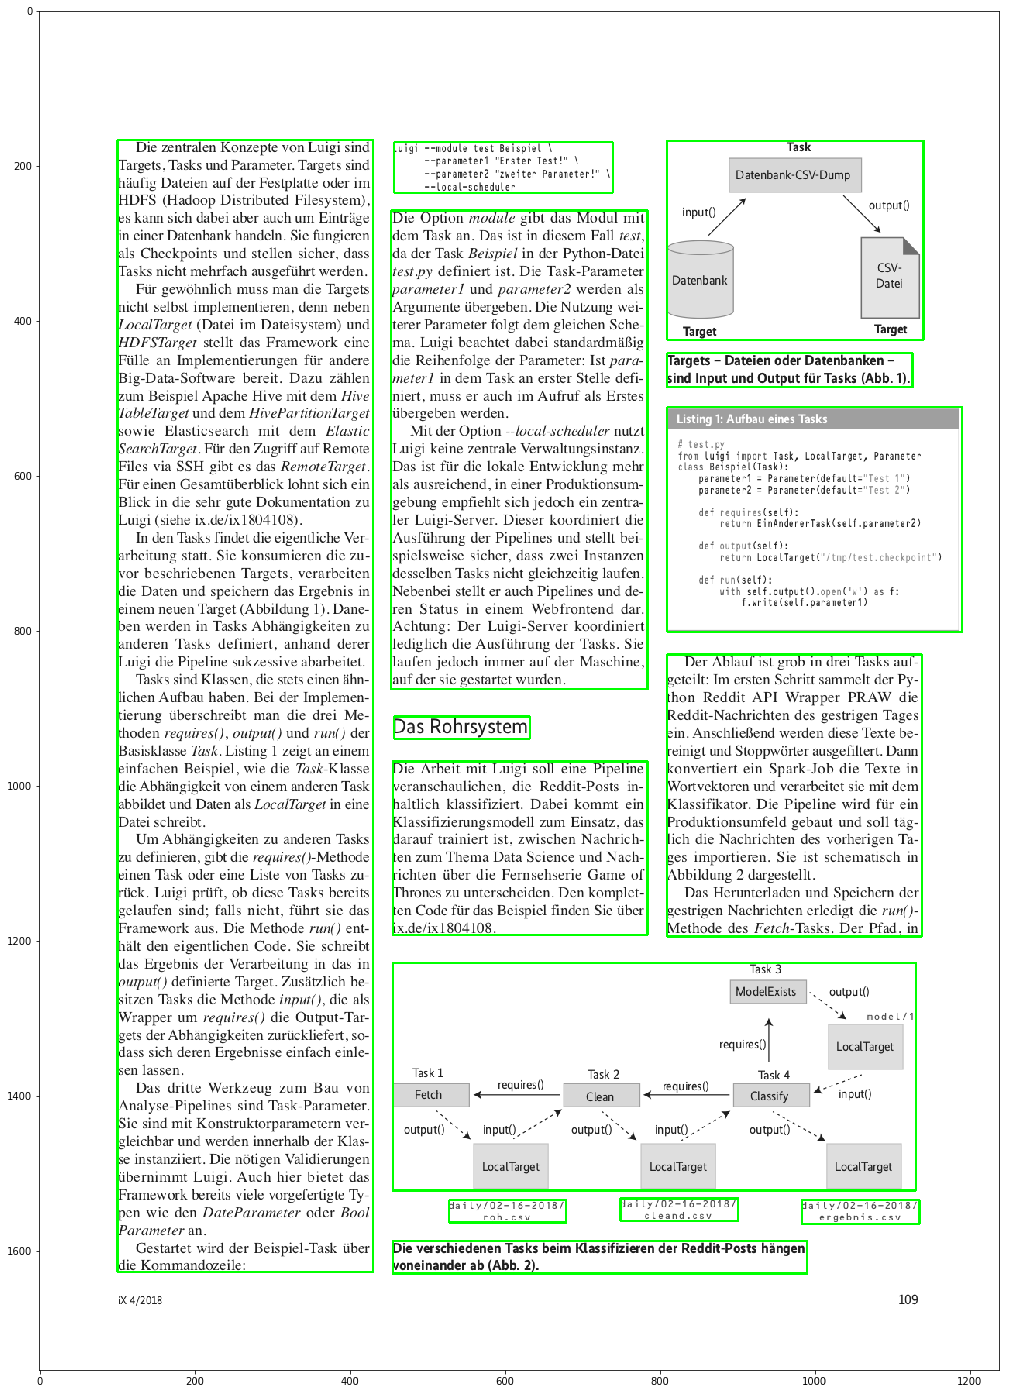

In [8]:
vis = cv2.cvtColor(im,cv2.COLOR_GRAY2RGB)
contours, hierarchy = cv2.findContours(connected, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
boxes = map(lambda c: cv2.boundingRect(c), contours)
filtered = filter(lambda b: b[2] > 20 and b[3] > 25, boxes)

for (x, y, w, h) in filtered:
    cv2.rectangle(vis, (x, y), (x+w-1, y+h-1), (0, 255, 0), 2)

plt.figure(figsize=(25, 25))
plt.imshow(vis)

# Convolution zum Weichzeichnen

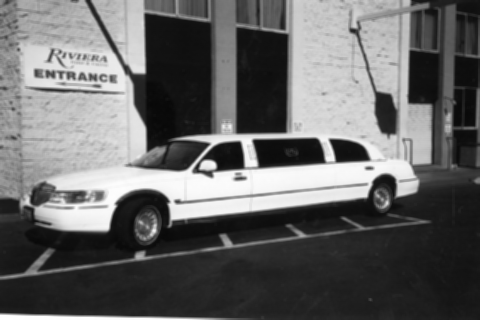

In [9]:
from PIL import Image
pic = cv2.imread('documents/auto.jpg', 0)
kernel = numpy.array([[1/9.,1/9.,1/9.],
                      [1/9.,1/9.,1/9.], 
                      [1/9.,1/9.,1/9.]])
lines = cv2.filter2D(pic, cv2.CV_8U, kernel)
Image.fromarray(lines)

# Convolution zur Schärfung

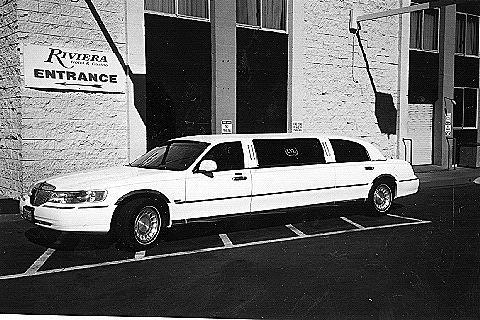

In [10]:
pic = cv2.imread('documents/auto.jpg', 0)
kernel = numpy.array([[0, -1, -0],
                      [-1, 5, -1], 
                      [0, -1, 0]])
lines = cv2.filter2D(pic, cv2.CV_8U, kernel)
Image.fromarray(lines)